Niachaj syhnał zadazieny funkcyjaj:

$f(t)=3sin(2π⋅5t)+2sin(2π⋅10t)+sin(2π⋅20t)$.

1. Pabudavać symulacyju syhnału na intervale [0,1]s pry dyskretnaj častaści 500 Hz.

2. Znajści FFT (dyskretnaja transfarmacyja Fouriera).

3. Pakazać na hrafiku amplitudny spektar syhnału.

4. Jakija častaści jość u syhnale? Raździalić $f(t)$ na sumu sinusaŭ.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft


Zadańnie 1.

In [28]:
fs = 400             # dyskretnaja častaść [Hz]
T = 1                # praciahłaść syhnału [s]
t = np.linspace(0, T, int(fs*T), endpoint=False)    # vektar času

Zadańnie 2.

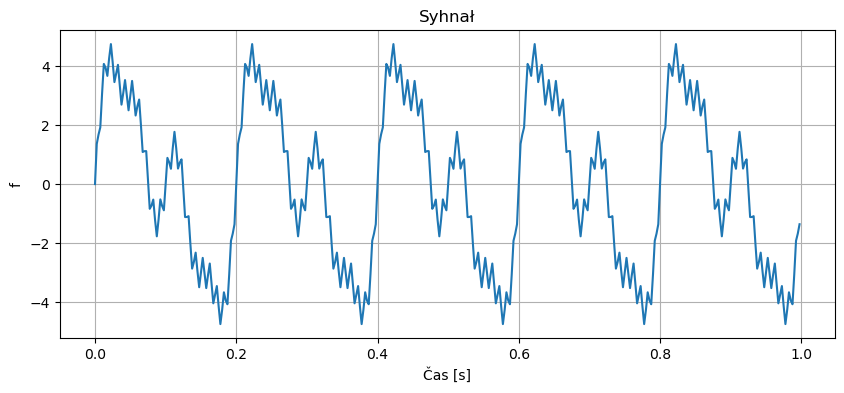

In [29]:
f = 3*np.sin(2*np.pi*5*t) + 2*np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) + 0.5*np.sin(2*np.pi*100*t)

plt.figure(figsize=(10, 4))
plt.plot(t,f)
plt.title("Syhnał")
plt.xlabel("Čas [s]")
plt.ylabel("f")
plt.grid(True)
plt.show()

Zadańnie 3, 4.

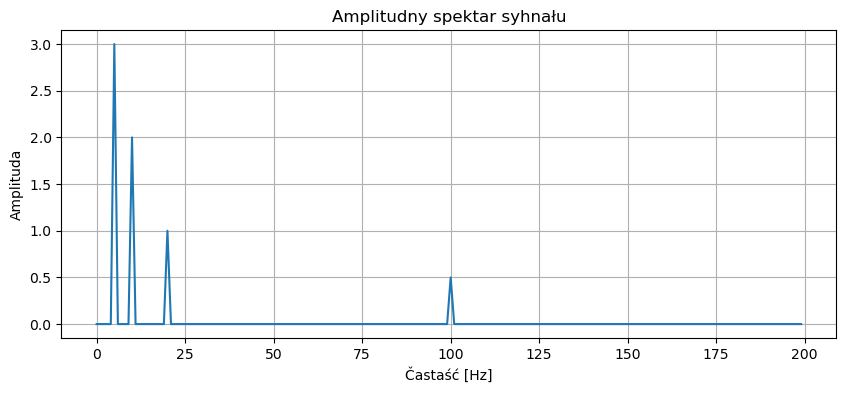

In [30]:
N = len(f)
F = fft(f)
frequencies = fftfreq(N, 1/fs)
amplitudes = 2.0/N * np.abs(F[:N//2])  # amplitudny spektar


plt.figure(figsize=(10, 4))
plt.plot(frequencies[:N//2], amplitudes)
plt.title("Amplitudny spektar syhnału")
plt.xlabel("Častaść [Hz]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()

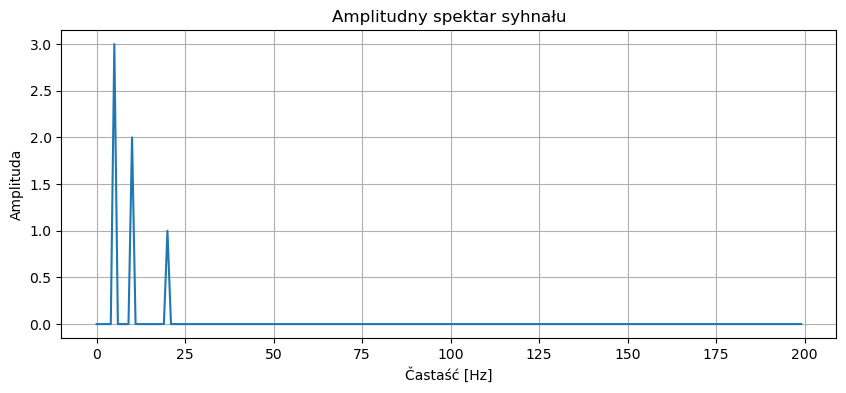

In [31]:
F[50:] = 0
amplitudes = 2.0/N * np.abs(F[:N//2])

plt.figure(figsize=(10, 4))
plt.plot(frequencies[:N//2], amplitudes)
plt.title("Amplitudny spektar syhnału")
plt.xlabel("Častaść [Hz]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()

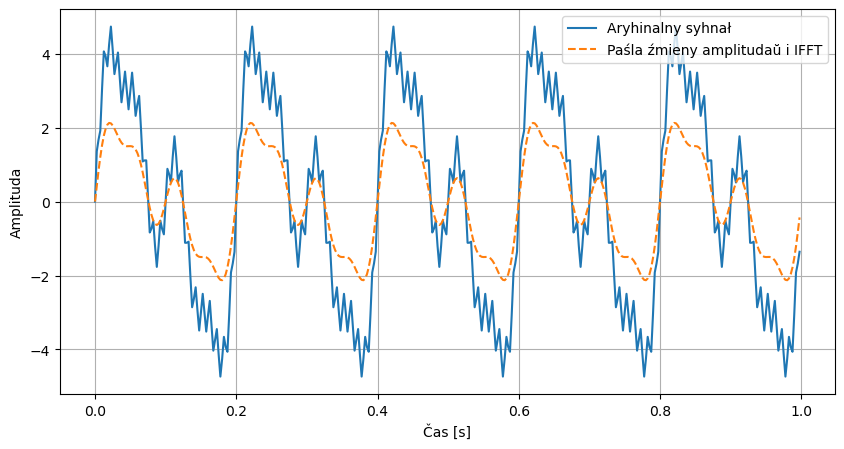

In [32]:
f_new = ifft(F)

f_new_real = f_new.real

plt.figure(figsize=(10, 5))
plt.plot(t, f, label="Aryhinalny syhnał")
plt.plot(t, f_new_real, label="Paśla źmieny amplitudaŭ i IFFT", linestyle='--')
plt.legend()
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()

In [47]:
import numpy as np
from scipy.fft import fft, fftfreq

# Parametry sygnału
fs = 600
T = 1
N = int(fs * T)
t = np.linspace(0, T, N, endpoint=False)
f = 3*np.sin(2*np.pi*5*t) + 2*np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

# Transformata Fouriera
F = fft(f)
freqs = fftfreq(N, 1/fs)

# Bierzemy tylko dodatnie częstotliwości
half_N = N // 2
freqs_pos = freqs[:half_N]
F_pos = F[:half_N]

# Wypisujemy dominujące częstotliwości i ich współczynniki
threshold = 0.1  # można zmienić
print("Dominujące składowe (|F[k]| > {:.2f}):".format(threshold))
for i, (fk, Fk) in enumerate(zip(freqs_pos, F_pos)):
    amplitude = np.abs(Fk) *2 / N
    if amplitude > threshold:
        print(f"f = {fk:.1f} Hz\t|F| = {amplitude:.2f}\tRe = {Fk.real:.2f}\tIm = {Fk.imag:.2f}")


Dominujące składowe (|F[k]| > 0.10):
f = 5.0 Hz	|F| = 3.00	Re = 0.00	Im = -900.00
f = 10.0 Hz	|F| = 2.00	Re = 0.00	Im = -600.00
f = 20.0 Hz	|F| = 1.00	Re = 0.00	Im = -300.00
